## Effect of batch size notebook

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [18]:
series = 20
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [19]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['1', '2', '4', '8', '16'],
    'data_type': 'image',
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_variants': ['yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x'],
    'node_name': 'yolo',
    'pipeline_name': '5-paper-video',
    'repetition': 1,
    'replicas': [1],
    'series': 20,
    'series_meta': 'checking the effect of changing all variables under '
                   'arrival rate 1,\\n cpu type: Intel(R) Xeon(R) Gold 6126 '
                   'CPU @ 2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1]},
    'workload_type': 'static'}


,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,1,1,51.172506,205.523220,46.454599
1,yolov5n,1,2,8.257732,277.359222,5.696570
2,yolov5n,1,4,1.224478,296.277427,0.604850
3,yolov5n,1,8,0.501651,241.272064,0.290312
4,yolov5n,1,16,0.475230,250.483911,0.265208
5,yolov5n,2,1,11.967053,170.574176,7.964693
6,yolov5n,2,2,3.802585,245.934783,2.869554
7,yolov5n,2,4,1.864932,225.954413,1.425276
8,yolov5n,2,8,0.850962,220.159570,0.597579
9,yolov5n,2,16,0.576656,202.623232,0.474273


Text(0, 0.5, 'Latency (seconds)')

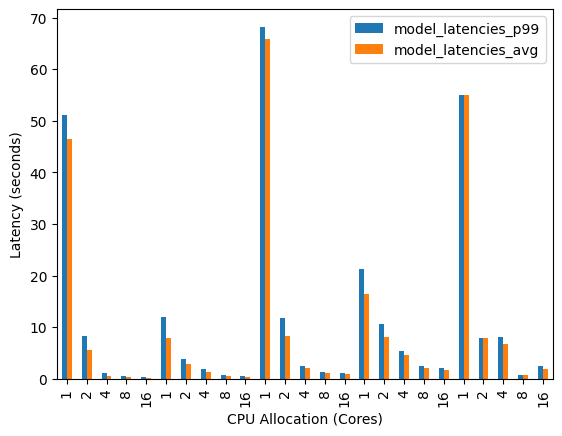

In [20]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5n']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (Cores)")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5s,1,1,11.028273,179.520210,8.739435
5,yolov5s,2,1,NaN,233.453482,NaN
10,yolov5s,4,1,20.971763,177.617288,17.935693
15,yolov5s,8,1,66.458819,229.252580,66.458819
20,yolov5s,16,1,8.265525,175.465502,8.265525
1,yolov5s,1,2,5.453459,270.452360,3.198510
6,yolov5s,2,2,11.567538,261.211978,9.371763
11,yolov5s,4,2,7.673199,216.225793,6.563114
16,yolov5s,8,2,19.509216,250.544462,17.500918
21,yolov5s,16,2,6.448623,201.272446,6.448623


Text(0, 0.5, 'Latency (seconds)')

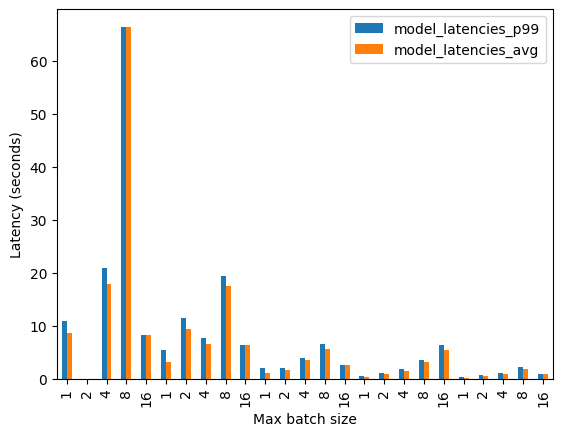

In [15]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5s']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns).sort_values(['cpu_request', 'max_batch_size'])
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5s,1,1,11.028273,179.520210,8.739435
1,yolov5s,1,2,5.453459,270.452360,3.198510
2,yolov5s,1,4,1.984098,342.435599,1.187281
3,yolov5s,1,8,0.571175,283.361000,0.364619
4,yolov5s,1,16,0.377766,245.254364,0.271826
5,yolov5s,2,1,NaN,233.453482,NaN
6,yolov5s,2,2,11.567538,261.211978,9.371763
7,yolov5s,2,4,2.124462,242.464246,1.699273
8,yolov5s,2,8,1.101648,233.364198,0.859085
9,yolov5s,2,16,0.668993,223.557493,0.539889


,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,max_batch_size_num,cpu_request_num
0,yolov5s,1,1,11.028273,179.520210,8.739435,0,0
1,yolov5s,1,2,5.453459,270.452360,3.198510,0,1
2,yolov5s,1,4,1.984098,342.435599,1.187281,0,2
3,yolov5s,1,8,0.571175,283.361000,0.364619,0,3
4,yolov5s,1,16,0.377766,245.254364,0.271826,0,4
5,yolov5s,2,1,NaN,233.453482,NaN,1,0
6,yolov5s,2,2,11.567538,261.211978,9.371763,1,1
7,yolov5s,2,4,2.124462,242.464246,1.699273,1,2
8,yolov5s,2,8,1.101648,233.364198,0.859085,1,3
9,yolov5s,2,16,0.668993,223.557493,0.539889,1,4


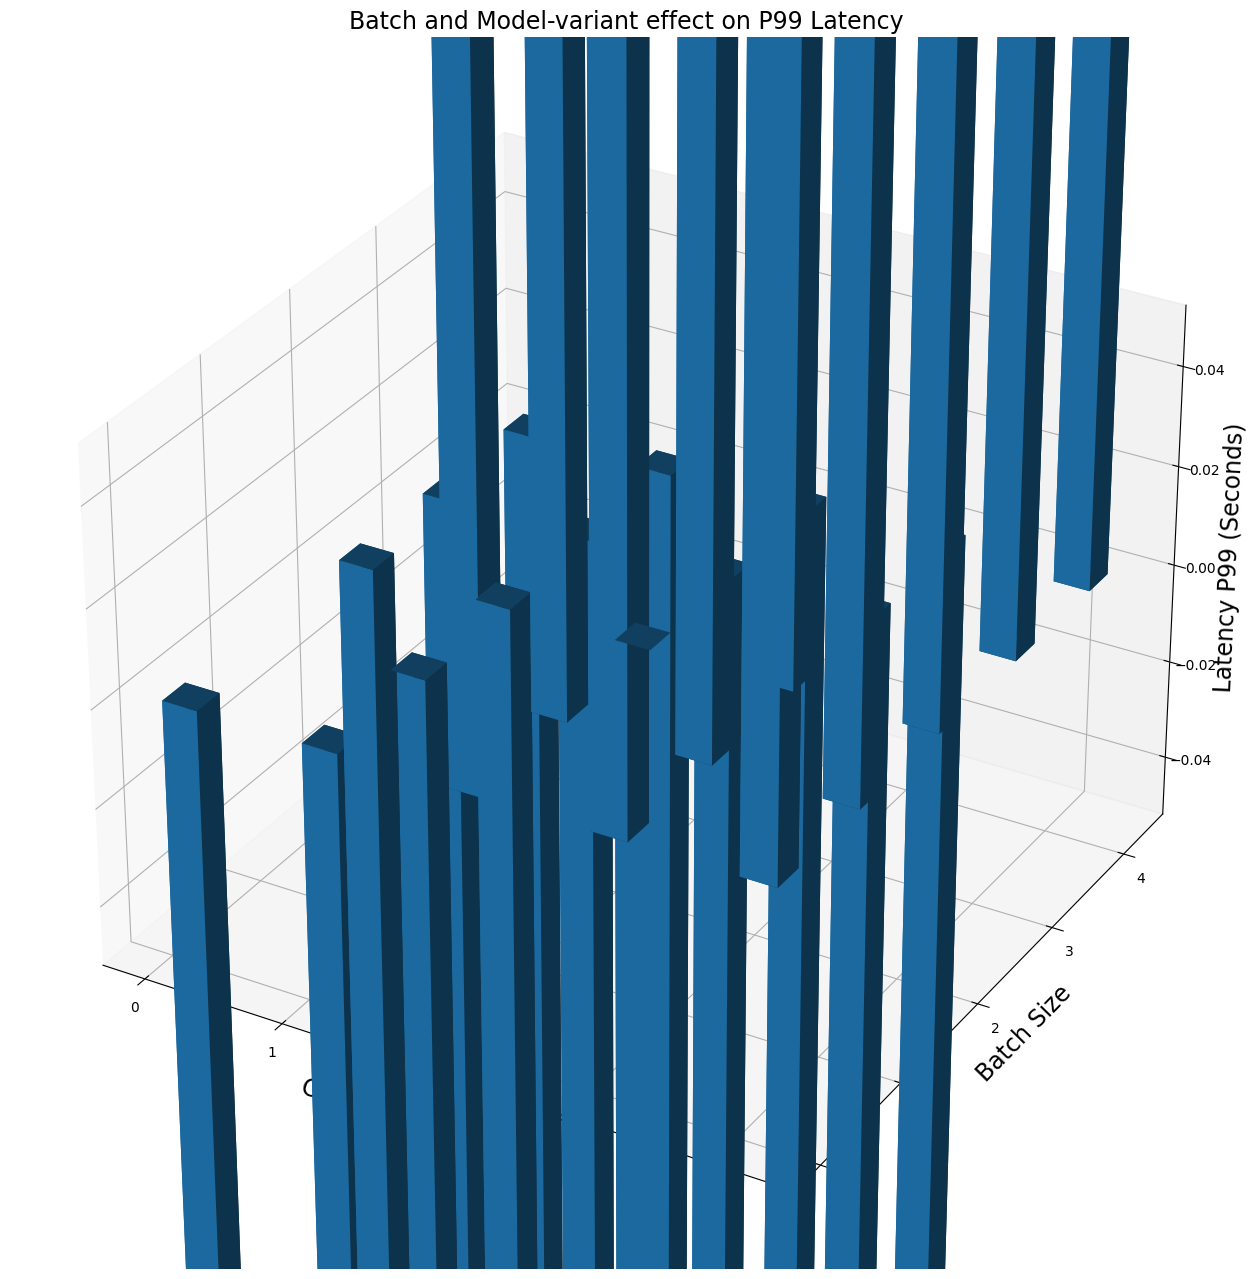

In [16]:
from ipaddress import collapse_addresses
import numpy as np
import matplotlib.pyplot as plt

# model_vairant = 'resnet152'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5s']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)

display(output)

output['max_batch_size_num'] = output['max_batch_size'].replace({
    1: 0,
    2: 1,
    4: 2,
    8: 3,
    16: 4,
})

output['cpu_request_num'] = output['cpu_request'].replace({
    1: 0,
    2: 1,
    4: 2,
    8: 3,
    16: 4,
})

display(output)

# setup the figure and axes
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(111, projection='3d')

dx = 0.25
dy = 0.25

# colors = ['skyblue', 'g', 'r', 'pink', 'coral']

y = output['max_batch_size_num']
x = output['cpu_request_num']
top = output['model_latencies_avg']
z = np.zeros_like(top)

ax1.bar3d(x, y, z, dx, dy, top, shade=True)
ax1.set_title('Batch and Model-variant effect on P99 Latency', size=17)
ax1.set_xlabel('CPU Request (Cores)', size=17)
ax1.set_ylabel('Batch Size', size=17)
ax1.set_zlabel('Latency P99 (Seconds)', size=17)
# ax1.set_yticklabels(['resnet18', 'resnet50', 'resnet152'])
# ax1.set_ylim(0, 1)
# experiment_ids
# ax1.view_init(120, 120)


plt.show()